In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('scholarship.csv')

In [60]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


### Outliers

#### By IQR

C:\Users\kalat\AppData\Local\Temp\ipykernel_21924\4022945970.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['scholarship_exam_marks'])


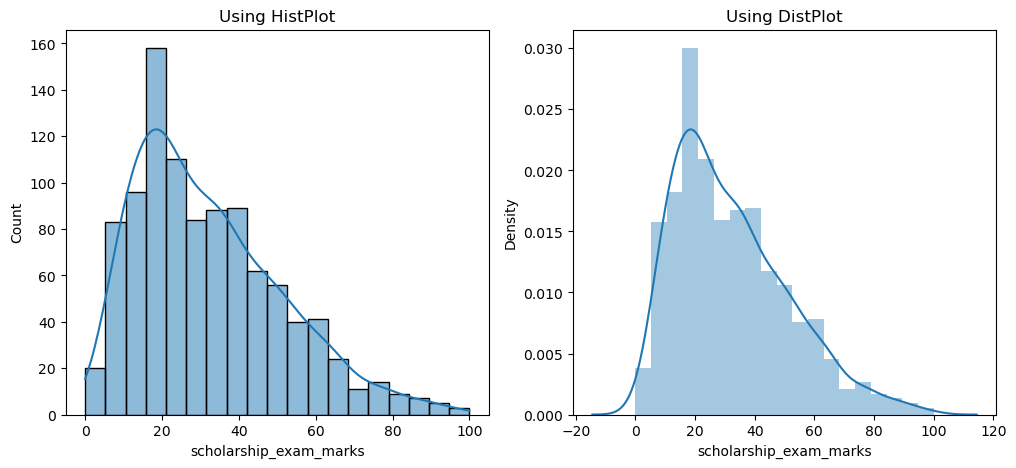

In [61]:
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['scholarship_exam_marks'], kde = True)
plt.title('Using HistPlot')

plt.subplot(1, 2, 2)
sns.distplot(df['scholarship_exam_marks'])
plt.title('Using DistPlot')

plt.show()

In [62]:
df.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship
count,1000.000000,1000.000000,1000.000000
mean,69.612400,32.225000,0.489000
std,6.158979,19.130822,0.500129
min,48.900000,0.000000,0.000000
25%,65.500000,17.000000,0.000000
50%,69.600000,28.000000,0.000000
75%,73.700000,44.000000,1.000000
max,91.200000,100.000000,1.000000


In [63]:
Q1 = df['scholarship_exam_marks'].quantile(.25)
print('Q1  :', Q1)
Q3 = df['scholarship_exam_marks'].quantile(.75)
print('Q3  :', Q3)

IQR = Q3 - Q1
print('IQR :', IQR)

Q1  : 17.0
Q3  : 44.0
IQR : 27.0


In [64]:
max_allowed = Q3 + 1.5 * IQR
low_allowed = Q1 - 1.5 * IQR

In [65]:
outliers_iqr = df[(df['scholarship_exam_marks'] < low_allowed) | (df['scholarship_exam_marks'] > max_allowed)]

In [66]:
outliers_iqr

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
40,66.0,86,1
61,75.1,86,0
134,63.3,93,0
162,78.0,90,0
283,70.9,87,0
290,83.8,87,0
311,69.7,87,1
324,66.4,90,0
630,65.6,96,1


In [67]:
without_out_iqr = df[(df['scholarship_exam_marks'] > low_allowed) & (df['scholarship_exam_marks'] < max_allowed)]

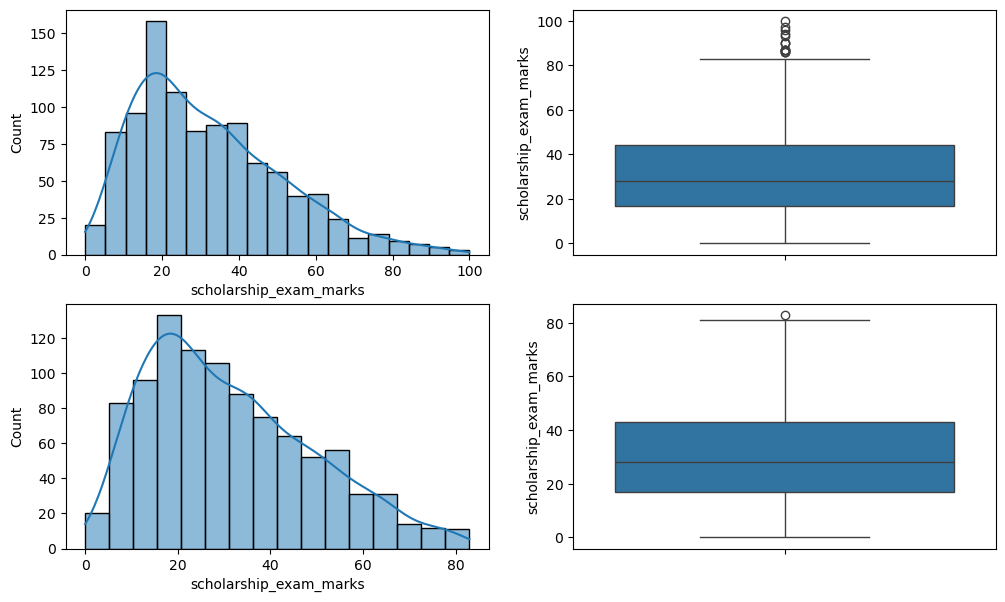

In [75]:
plt.figure(figsize = (12, 7))

plt.subplot(2, 2, 1)
sns.histplot(df['scholarship_exam_marks'], kde = True)
plt.subplot(2, 2, 2)
sns.boxplot(df['scholarship_exam_marks'])

plt.subplot(2, 2, 3)
sns.histplot(without_out_iqr['scholarship_exam_marks'], kde = True)
plt.subplot(2, 2, 4)
sns.boxplot(without_out_iqr['scholarship_exam_marks'])

plt.show()

##### Cap Outliers instead of removing them

In [76]:
capped = df.copy()

In [77]:
capped['scholarship_exam_marks'] = np.where(df['scholarship_exam_marks'] > max_allowed, max_allowed,
                                           np.where(df['scholarship_exam_marks'] < low_allowed, low_allowed,
                                                   df['scholarship_exam_marks']))

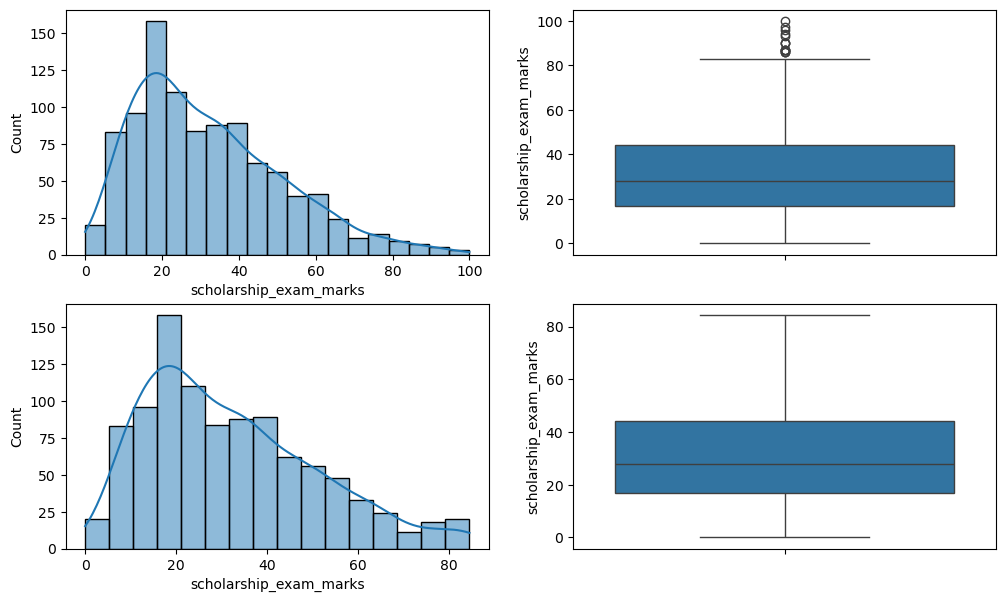

In [78]:
plt.figure(figsize = (12, 7))

plt.subplot(2, 2, 1)
sns.histplot(df['scholarship_exam_marks'], kde = True)
plt.subplot(2, 2, 2)
sns.boxplot(df['scholarship_exam_marks'])

plt.subplot(2, 2, 3)
sns.histplot(capped['scholarship_exam_marks'], kde = True)
plt.subplot(2, 2, 4)
sns.boxplot(capped['scholarship_exam_marks'])

plt.show()